In [1]:
import os

output_model_path = os.environ["DATA"] + "/05_chapter_SOTA/04.02_search_disgraceful_molecule"
output_fig_path = os.environ["FIGURES"] + "/05_chapter_SOTA/04.02_search_disgraceful_molecule"


# QED gaussian
mu = 0.8
sigma = 0.5

# SAScore lin sigm
a = -1
b = 5
l = 20


### Defining and testing wrappers

In [2]:
from math import exp
from scipy.stats import norm

def gaussian_wrapper(value, mu, sigma):
    return norm(loc=mu, scale=sigma).pdf(value)

def lin_sigm_wrapper(value, a, b, l):
    return 1 / (1 + exp(l * (a * value + b)))


### Testing gaussian

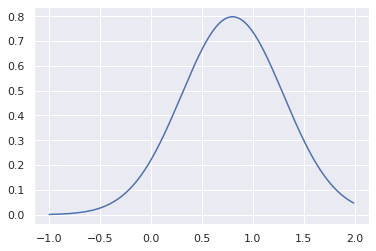

In [3]:
import numpy as np
import seaborn as sns
sns.set()

x_arr = np.arange(-1, 2, 0.01)
y_arr = []
for x in x_arr:
    y_arr.append(gaussian_wrapper(x, mu, sigma))
    
sns.lineplot(x_arr, y_arr)

### Testing lin sigmoid

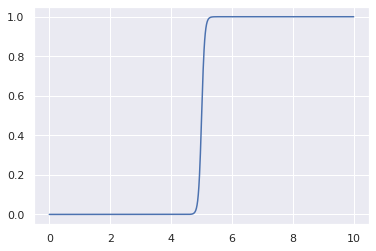

In [4]:
x_arr = np.arange(0, 10, 0.01)
y_arr = []
for x in x_arr:
    y_arr.append(lin_sigm_wrapper(x, a, b, l))
    
sns.lineplot(x_arr, y_arr)

### Defining objective function

In [5]:
from evomol.evomol.molgraphops.molgraph import MolGraph
from rdkit.Chem import MolFromSmiles
from evomol.evomol.evaluation import QEDEvaluationStrategy, SAScoreEvaluationStrategy

def obj_function(smi):
    
    molgraph = MolGraph(MolFromSmiles(smi))
    
    qed_score, _ = QEDEvaluationStrategy().evaluate_individual(molgraph)
    sa_score, _ = SAScoreEvaluationStrategy().evaluate_individual(molgraph)
    
    return np.prod([gaussian_wrapper(qed_score, mu, sigma), lin_sigm_wrapper(sa_score, a, b, l)])

Using TensorFlow backend.


### Launching model

In [6]:
from evomol.evomol import run_model

run_model({
    "obj_function": (obj_function, "gaussian_qed_sigm_sa"),
    "action_space_parameters":{
        "atoms": "C,N,O,F"
    },
    "io_parameters": {
        "model_path": output_model_path
    }
})

SYMBOLS LIST : ['C', 'N', 'O', 'F']
Computing descriptors at initialization...
Start pop algorithm
gaussian_qed_sigm_sa_mean : 0.54152
gaussian_qed_sigm_sa_med : 0.54152
gaussian_qed_sigm_sa_std : 0.00000
gaussian_qed_sigm_sa_min : 0.54152
gaussian_qed_sigm_sa_max : 0.54152
total_mean : 0.54152
total_med : 0.54152
total_std : 0.00000
total_min : 0.54152
total_max : 0.54152
new step
step : 0
best : C
gaussian_qed_sigm_sa_mean : 0.55932
gaussian_qed_sigm_sa_med : 0.55932
gaussian_qed_sigm_sa_std : 0.01780
gaussian_qed_sigm_sa_min : 0.54152
gaussian_qed_sigm_sa_max : 0.57711
total_mean : 0.55932
total_med : 0.55932
total_std : 0.01780
total_min : 0.54152
total_max : 0.57711
new step
step : 1
best : N
gaussian_qed_sigm_sa_mean : 0.37288
gaussian_qed_sigm_sa_med : 0.54152
gaussian_qed_sigm_sa_std : 0.26407
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.57711
total_mean : 0.37288
total_med : 0.54152
total_std : 0.26407
total_min : 0.00000
total_max : 0.57711
new step
step : 

gaussian_qed_sigm_sa_mean : 0.22479
gaussian_qed_sigm_sa_med : 0.00634
gaussian_qed_sigm_sa_std : 0.27584
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.76750
total_mean : 0.22479
total_med : 0.00634
total_std : 0.27584
total_min : 0.00000
total_max : 0.76750
new step
step : 27
best : FCCC(F)On1[nH]o1
gaussian_qed_sigm_sa_mean : 0.23469
gaussian_qed_sigm_sa_med : 0.01026
gaussian_qed_sigm_sa_std : 0.28142
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.77609
total_mean : 0.23469
total_med : 0.01026
total_std : 0.28142
total_min : 0.00000
total_max : 0.77609
new step
step : 28
best : FC(F)OC(F)n1[nH]o1
gaussian_qed_sigm_sa_mean : 0.24528
gaussian_qed_sigm_sa_med : 0.01894
gaussian_qed_sigm_sa_std : 0.28510
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.78172
total_mean : 0.24528
total_med : 0.01894
total_std : 0.28510
total_min : 0.00000
total_max : 0.78172
new step
step : 29
best : CCC(F)C(F)On1[nH]o1
gaussian_qed_sigm_sa_mean : 0.25364

gaussian_qed_sigm_sa_mean : 0.46273
gaussian_qed_sigm_sa_med : 0.61584
gaussian_qed_sigm_sa_std : 0.33214
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.79788
total_mean : 0.46273
total_med : 0.61584
total_std : 0.33214
total_min : 0.00000
total_max : 0.79788
new step
step : 56
best : FCC1(n2[nH]o2)CC2(OF)C(F)=C(F)C21
gaussian_qed_sigm_sa_mean : 0.46885
gaussian_qed_sigm_sa_med : 0.62379
gaussian_qed_sigm_sa_std : 0.33198
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.79788
total_mean : 0.46885
total_med : 0.62379
total_std : 0.33198
total_min : 0.00000
total_max : 0.79788
new step
step : 57
best : FCC1(n2[nH]o2)CC2(OF)C(F)=C(F)C21
gaussian_qed_sigm_sa_mean : 0.47476
gaussian_qed_sigm_sa_med : 0.63114
gaussian_qed_sigm_sa_std : 0.33173
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.79788
total_mean : 0.47476
total_med : 0.63114
total_std : 0.33173
total_min : 0.00000
total_max : 0.79788
new step
step : 58
best : FCC1(n2[nH]o2)CC2(OF)C(

gaussian_qed_sigm_sa_mean : 0.56447
gaussian_qed_sigm_sa_med : 0.74691
gaussian_qed_sigm_sa_std : 0.31153
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.79788
total_mean : 0.56447
total_med : 0.74691
total_std : 0.31153
total_min : 0.00000
total_max : 0.79788
new step
step : 81
best : FOC1(C2C(F)C2n2[nH]o2)OC(F)=C1F
gaussian_qed_sigm_sa_mean : 0.56702
gaussian_qed_sigm_sa_med : 0.74878
gaussian_qed_sigm_sa_std : 0.31041
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.79788
total_mean : 0.56702
total_med : 0.74878
total_std : 0.31041
total_min : 0.00000
total_max : 0.79788
new step
step : 82
best : FOC1(C2C(F)C2n2[nH]o2)OC(F)=C1F
gaussian_qed_sigm_sa_mean : 0.56951
gaussian_qed_sigm_sa_med : 0.75073
gaussian_qed_sigm_sa_std : 0.30943
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.79788
total_mean : 0.56951
total_med : 0.75073
total_std : 0.30943
total_min : 0.00000
total_max : 0.79788
new step
step : 83
best : FOC1(C2C(F)C2n2[nH]o2)OC(F)

### Drawing solution

In [1]:
sol = MolGraph(MolFromSmiles("FOC1(C2C(F)C2n2[nH]o2)OC(F)=C1F"))

sol.draw(size=500, show=False)

NameError: name 'MolGraph' is not defined

In [8]:
qed_score, _ = QEDEvaluationStrategy().evaluate_individual(sol)
print("QED : " + str(qed_score))


QED : 0.8000263795714773


In [9]:
sa_score, _ = SAScoreEvaluationStrategy().evaluate_individual(sol)
print("SAScore : " + str(sa_score))


SAScore : 6.1643242786537895


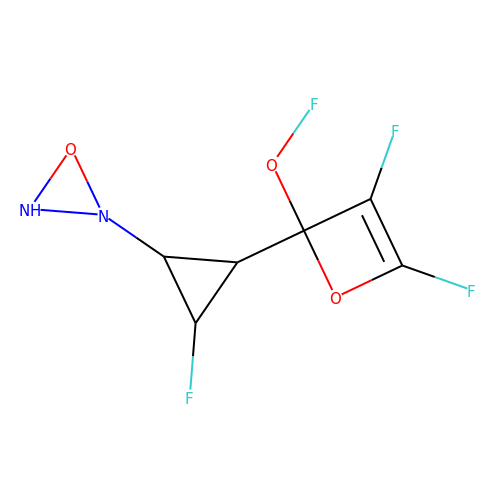

In [10]:
from os.path import join

sol.draw(write_to_path=join(output_fig_path, "mol.png"), size=500, show=False)